# Basit Doğrusal Regresyon

### Model

In [3]:
import pandas as pd 
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
import seaborn as sns

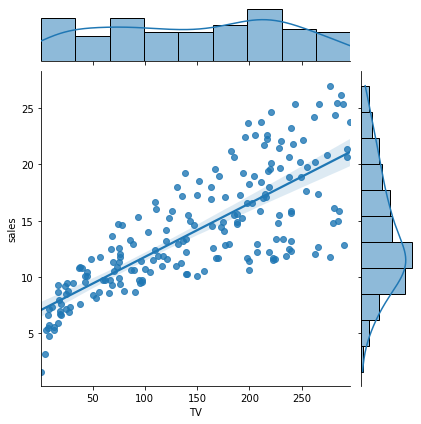

In [9]:
sns.jointplot(x="TV",y = "sales", data=df , kind="reg");

In [10]:
from sklearn.linear_model import LinearRegression

In [15]:
#bagımsız değişken
X = df[["TV"]]

In [12]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [16]:
#bağımlı değişken
y = df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [24]:
#Model nesnesi oluşturma
reg = LinearRegression()

In [25]:
model = reg.fit(X,y)

In [26]:
model

LinearRegression()

In [27]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [34]:
model.intercept_   #sabit

array([7.03259355])

In [35]:
model.coef_     #b1 katsayısı

array([[0.04753664]])

In [30]:
#rkare
model.score(X,y)

0.611875050850071

 ### Tahmin

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 28.27)

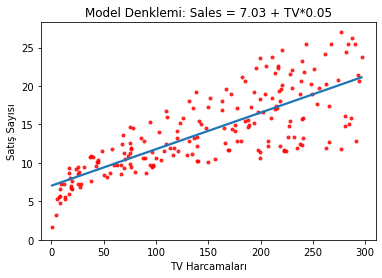

In [33]:
import seaborn as sns 
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"], df["sales"],ci=None ,scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0)

Sales = 7.03 + 0.05*TV

In [39]:
model.intercept_  + model.coef_ *165

array([[14.87613922]])

In [41]:
model.predict([[165]])    #tahminde bulunma

array([[14.87613922]])

In [40]:
yeni_veri = [[5],[15],[30]]

In [42]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

## Artıklar ve Makine Öğrenmesindeki Önemi

- **MSE: Hata Kareler Ortalaması** 
- **RSME: Hata Kareler Ortamasının Karekökü**

In [43]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [44]:
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [47]:
gercek_y = y[0:10]

In [48]:
tahmin_y = pd.DataFrame(model.predict(X)[0:10])

In [49]:
hatalar = pd.concat([gercek_y,tahmin_y],axis=1)

In [51]:
hatalar.columns= ["gercek_y","tahmin_y"]

In [52]:
hatalar

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [55]:
hatalar["hata"]= hatalar["gercek_y"] - hatalar["tahmin_y"]

In [54]:
hatalar

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [62]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [63]:
hatalar

,gercek_y,tahmin_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [64]:
import numpy as np
np.mean(hatalar["hata_kareler"])

9.290350329638105

# Çoklu Doğrusal Regresyon

### Model

In [65]:
import pandas as pd 
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [69]:
X = df.drop('sales',axis=1)
y = df[["sales"]]

In [70]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [71]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [72]:
#Statsmodels ile model kurmak 

In [74]:
import statsmodels.api as sm

In [75]:
lm = sm.OLS(y,X)

In [80]:
model = lm.fit()         #modeli kurma

In [79]:
model.summary()        #modelin özellikleri

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                   2.43e-171
Time:                        22:19:53   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#Scikit learn ile model kurmak

In [83]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [85]:
model = lm.fit(X,y)

In [86]:
model.intercept_

array([2.93888937])

In [87]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

### Tahmin

#### Sales = 2.94 +TV * 0.04 + radio * 0.19 - newspaper * 0.001

- 30 birim TV
- 10 birim radio 
- 40 birim gazete
 harcaması

In [88]:
2.94 +30 * 0.04 + 10 * 0.19 - 40 * 0.001

5.999999999999999

In [95]:
yeni_veri = [[30],[10],[40]]

In [96]:
yeni_veri = pd.DataFrame(yeni_veri).T

In [97]:
yeni_veri

,0,1,2
0,30,10,40


In [98]:
model.predict(yeni_veri)

array([[6.15562918]])

In [100]:
from sklearn.metrics import mean_squared_error

In [102]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [103]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [107]:
MSE = mean_squared_error(y,model.predict(X))      #HATA KARALER ORTALAMASı
MSE

2.784126314510936

In [111]:
RMSE = np.sqrt(MSE)   #HATA KARELER ORTALAMSININ KAREKÖKÜ
RMSE

1.6685701407225697

### Model Tuning(Model Doğrulama)

In [112]:
 X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [113]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [114]:
#sınama seti 
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test , y_train,y_test = train_test_split(X,y, test_size = 0.20 ,random_state=99)

In [116]:
X_train.head()

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


In [117]:
y_train.head()

,sales
16,12.5
51,10.7
97,15.5
164,11.9
71,12.4


In [118]:
 X_test.head()

,TV,radio,newspaper
135,48.3,47.0,8.5
127,80.2,0.0,9.2
191,75.5,10.8,6.0
66,31.5,24.6,2.2
119,19.4,16.0,22.3


In [120]:
y_test.head()

,sales
135,11.6
127,8.8
191,9.9
66,9.5
119,6.6


In [121]:
lm = LinearRegression()

In [122]:
model = lm.fit(X_train,y_train)

In [124]:
#eğitim(train) hatası
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.7236824822650754

In [125]:
#Test hatası
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.4312783138301641

In [126]:
#k-katlı cv 

In [127]:
from sklearn.model_selection import cross_val_score

In [129]:
cross_val_score(model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error") #cv kaç katlı olduğunu söyler

array([-2.1019073 , -2.48953197, -3.09704214, -2.34694216, -3.68175761,
       -1.8691401 , -3.18173007, -4.1927349 , -2.17128376, -8.03821974])

In [131]:
#cross validation ile elde edilmiş MSE değeri
np.mean(-cross_val_score(model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error"))

3.3170289742341246

In [133]:
#cv RMSE
np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error")))

1.8212712522395242

# Ridge Regresyon

**Gerekli Kütüphaneler**

In [140]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt 
from sklearn.linear_model import RidgeCV

**Veri Seti**

In [190]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42)

In [145]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


### Model

In [146]:
ridge_model = Ridge(alpha=0.1).fit(X_train,y_train)

In [147]:
ridge_model

Ridge(alpha=0.1)

In [149]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [150]:
ridge_model.intercept_

-4.578626905721649

In [151]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [152]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [153]:
ridge_model = Ridge()

In [155]:
katsayılar = []

for i in lambdalar:
    ridge_model.set_params(alpha=i)             #set_params parametreleri ayarlamak
    ridge_model.fit(X_train,y_train)
    katsayılar.append(ridge_model.coef_)

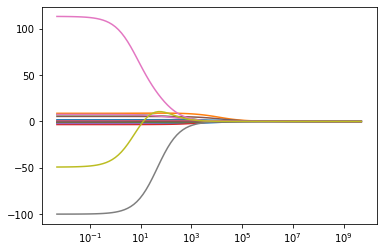

In [156]:
ax = plt.gca()
ax.plot(lambdalar,katsayılar)
ax.set_xscale("log")

### Tahmin

In [181]:
ridge_model = Ridge().fit(X_train,y_train)


In [164]:
y_pred = ridge_model.predict(X_train)

In [166]:
y_pred[:10]

array([ 377.43897818,  802.20172846,  495.61262179,  112.53310635,
        426.2235674 , 1004.23269616,  154.7234935 ,  362.55653134,
        485.36598379,  918.70526984])

In [170]:
y_train[:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [176]:
#train hatası
RMSE =np.sqrt(mean_squared_error(y_train,y_pred))

In [172]:
RMSE

289.3292830531484

In [175]:

np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error")))

351.823947885004

In [192]:
#test hatası
y_pred = ridge_model.predict(X_test)
RMSE =np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

356.80829057302384

### Model Tuning

In [202]:
ridge_model = Ridge(1).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.80829057302384

In [220]:
lambdalar1 = np.random.randint(0,1000,100)

In [204]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [205]:
ridgecv = RidgeCV(alphas = lambdalar2,scoring = "neg_mean_squared_error",cv=10,normalize=True)

In [206]:
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [209]:
ridgecv.alpha_   #optimum alpha

0.7599555414764666

In [208]:
#final modeli

In [210]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train,y_train)

In [211]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.8583047271521

******************************************

In [221]:
ridgecv = RidgeCV(alphas = lambdalar1,scoring = "neg_mean_squared_error",cv=10,normalize=True)

In [222]:
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([996, 565, 455, 289, 147,  17, 837,   5, 233, 823, 649, 897, 309,
       917, 993, 571, 192, 256, 259, 229, 117, 105, 242, 363, 232, 730,
       714, 846, 264,  57, 998, 486, 193, 329, 644,  84, 923, 477, 299,
       504, 160, 908, 569, 562, 382, 503, 257, 817, 345, 416, 860, 270,
       303,  91, 949, 135, 257, 692, 505, 279, 667, 295, 169, 917, 679,
       604, 591, 113, 383, 970, 433, 817, 954, 441, 653,  14, 735, 218,
       158,  14, 184, 301,  84, 950, 434, 526, 645, 400,  10, 663,  42,
       874, 885, 687, 117, 810, 549,  50, 865,   2]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [223]:
ridgecv.alpha_

2

In [225]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train,y_train)

In [226]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.64335435636787

# Lasso Regresyon

### Model

**Gerekli Kütüphaneler**

In [322]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt 
from sklearn.linear_model import RidgeCV, LassoCV

**Veri Seti**

In [323]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42)

In [324]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [325]:
df.shape

(263, 20)

In [326]:
lasso_model = Lasso().fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850395, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [327]:
lasso_model

Lasso()

In [328]:
lasso_model.intercept_

-5.5874506773361645

In [329]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [330]:
#Farklı lambda değerlerine karşılık katsayılar

In [331]:
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.55874145031, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679518908, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137467921, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

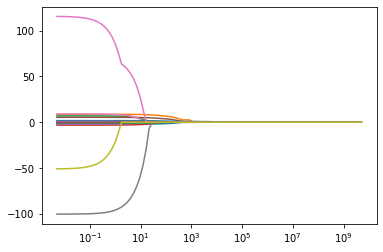

In [332]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

### Tahmin

In [333]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [334]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [335]:
y_pred = lasso_model.predict(X_test)

In [336]:
y_pred

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712,  344.61472086,  662.19913564,  452.93891559,
        913.97254298,  646.93182594,  693.29127151,  889.72270225,
        216.80738955,  444.31679776,  267.43564315,  502.73481304,
        802.91144581,   46.75917493, 1250.19710102,  319.81551701,
        426.69668097,  744.89682685,  572.89404168,  655.00021586,
        618.87241628,  205.45290205,  882.71797082,  256.08341636,
        426.68039556,   87.90166962,  146.23608726,  130.684237  ,
        365.09532007,  458.12199232,  273.59799481,  275.69549489,
       1324.39885373,  106.27926169,  135.25316274,  247.85827583,
         56.71307915,  296.39650484,  590.29780854,  400.95636878,
        770.74656352,  712.15988186,  346.60197138,  277.38671055,
        258.49654347,  665.79535225,  759.33779808,  313.23934805,
        766.82012469,  193.17703834,  281.20220882,  588.32323228,
        661.94129634,  806.37521659,  166.10323248, 1170.12694

In [337]:
np.sqrt(mean_squared_error(y_test,y_pred))       #test hatası

356.09758845540347

In [338]:
r2_score(y_test,y_pred)

0.41422798132366134

### Model Tuning

In [339]:
lasso_cv_model = LassoCV(cv=10, max_iter = 100000).fit(X_train,y_train)

In [340]:
lasso_cv_model.alpha_

563.4670501833854

In [341]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)

In [342]:
y_pred = lasso_tuned.predict(X_test)

In [343]:
np.sqrt(mean_squared_error(y_test,y_pred))

373.5957225069794

In [344]:
pd.Series(lasso_tuned.coef_,index = X_train.columns)

AtBat         -0.000000
Hits           2.533141
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.520003
Years          0.000000
CAtBat        -0.188935
CHits          0.360895
CHmRun        -0.000000
CRuns          0.835617
CRBI           0.427816
CWalks         0.000527
PutOuts        0.279218
Assists        0.081443
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

# ElasticNet Regresyon

### Model Tahmin

**Gerekli Kütüphaneler**

In [345]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt 
from sklearn.linear_model import RidgeCV, Lasso, ElasticNetCV

**Veri Seti**

In [362]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42)

In [363]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [364]:
enet_model = ElasticNet().fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.79936731, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [365]:
enet_model.intercept_

-6.465955602111762

In [366]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [367]:
#tahmin
enet_model.predict(X_train)[:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [372]:
y_pred = enet_model.predict(X_test)

In [374]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.16765481812445

In [376]:
r2_score(y_test,y_pred)

0.4107022246932692

### Model Tuning

In [377]:
enet_cv_model = ElasticNetCV(cv=10).fit(X_train,y_train)

In [379]:
enet_cv_model.alpha_

5230.7647364798695

In [380]:
enet_cv_model.intercept_

-38.51940558394301

In [381]:
enet_cv_model.coef_

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [382]:
#final modeli

In [383]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [388]:
y_pred = enet_tuned.predict(X_test)

In [389]:
np.sqrt(mean_squared_error(y_test,y_pred))

394.15280563218795

In [390]:
?ElasticNet

Init signature:
ElasticNet(
    alpha=1.0,
    *,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read

In [391]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [397]:
enet_cv_model = ElasticNetCV(alphas = alphas , cv=10).fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3249.9483058303595, tolerance: 3241.4244490642727
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4337.003154430538, tolerance: 3241.4244490642727
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5751.424798006192, tolerance: 3241.4244490642727
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

In [398]:
enet_cv_model.alpha_

5748.784976988678

In [400]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [401]:
y_pred = enet_tuned.predict(X_test)

In [402]:
np.sqrt(mean_squared_error(y_test,y_pred))

393.9753065850553

In [1]:
pip install nbconvert
